In [4]:
# automatically reload edited source code
%load_ext autoreload
%autoreload 2

# external package imports
import numpy as np
import pandas as pd
import os, pdb, glob, time, argparse
from os.path import exists, split, isdir, getsize
from sdo_clv_pipeline.sdo_plot import *

# internal package imports
from sdo_clv_pipeline.paths import root
from sdo_clv_pipeline.sdo_io import *
from sdo_clv_pipeline.sdo_process import *
from sdo_clv_pipeline.sdo_io import * 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# returns four sorted lists with the path to each of the file types
data_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))
con_files, mag_files, dop_files, aia_files = find_data(data_dir, "2014")
print(con_files)
print(len(con_files))
# print(con_files)
# print(mag_files)
# print(dop_files)
# print(aia_files)

File counts:
CON: 192
MAG: 192
DOP: 192
AIA: 110
[datetime.datetime(2014, 1, 20, 0, 0), datetime.datetime(2014, 1, 17, 0, 0), datetime.datetime(2014, 1, 13, 0, 0), datetime.datetime(2014, 1, 10, 0, 0), datetime.datetime(2014, 2, 28, 0, 0), datetime.datetime(2014, 1, 24, 0, 0), datetime.datetime(2014, 2, 15, 0, 0), datetime.datetime(2014, 2, 27, 0, 0), datetime.datetime(2014, 3, 10, 16, 0), datetime.datetime(2014, 3, 19, 8, 0), datetime.datetime(2014, 1, 5, 0, 0), datetime.datetime(2014, 1, 7, 0, 0), datetime.datetime(2014, 1, 1, 0, 0), datetime.datetime(2014, 2, 5, 16, 0), datetime.datetime(2014, 3, 17, 0, 0), datetime.datetime(2014, 1, 11, 0, 0), datetime.datetime(2014, 2, 6, 0, 0), datetime.datetime(2014, 1, 28, 0, 0), datetime.datetime(2014, 3, 13, 16, 0), datetime.datetime(2014, 3, 29, 8, 0), datetime.datetime(2014, 1, 30, 0, 0), datetime.datetime(2014, 1, 19, 0, 0), datetime.datetime(2014, 2, 26, 16, 0), datetime.datetime(2014, 1, 18, 0, 0), datetime.datetime(2014, 2, 27, 8, 0), d

/Users/srugins/sdo-clv-pipeline/data
correct mag
correct dop
checking
set to nan
mask
About to construct SunMask
Entered SunMask.__init__


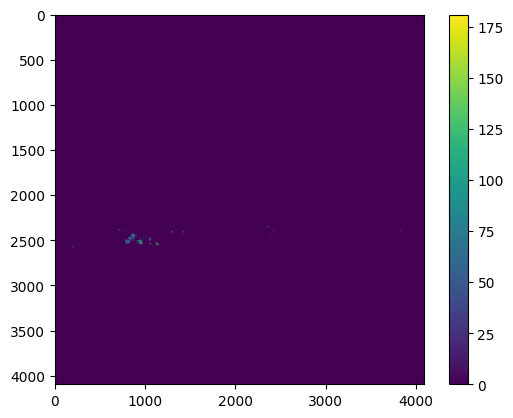

57
5312.0
	 >>> Region identification failed, skipping 2014-01-01T00:00:00
/Users/srugins/sdo-clv-pipeline/data
correct mag
correct dop
checking
set to nan
mask
About to construct SunMask
Entered SunMask.__init__


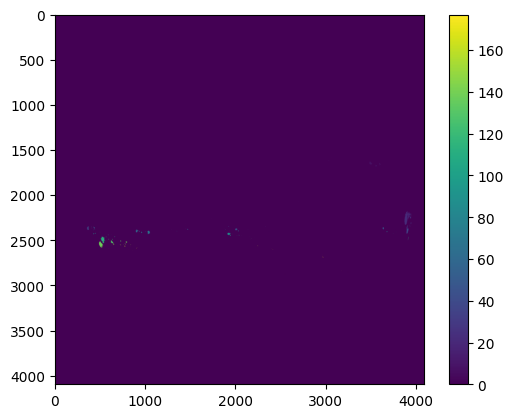

21
3678.0
	 >>> Region identification failed, skipping 2014-01-02T00:00:00
/Users/srugins/sdo-clv-pipeline/data
correct mag
correct dop
checking
set to nan
mask
About to construct SunMask
Entered SunMask.__init__


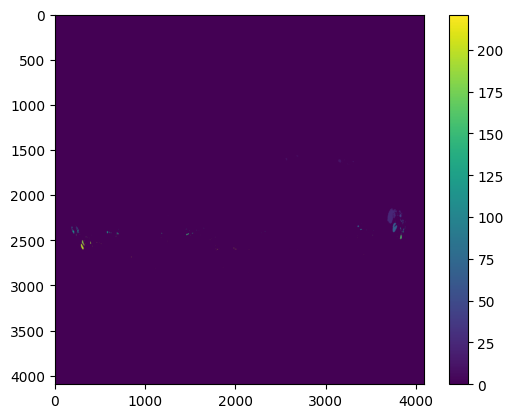

12
859.0
	 >>> Region identification failed, skipping 2014-01-03T00:00:00
/Users/srugins/sdo-clv-pipeline/data


In [ ]:
moat_vels = []
moat_mags = []
moat_ints = []
moat_dilations = []
moat_areas = []
moat_thetas = []
moat_vals = []
counter = -1
moat_avg_vels = []
symbol = []
left_moats = []
right_moats = []

for i in range (0,5):
    # define the paths where files live
    con_file = os.path.join(data_dir, con_files[i])
    mag_file = os.path.join(data_dir, mag_files[i])
    dop_file = os.path.join(data_dir, dop_files[i])
    aia_file = os.path.join(data_dir, aia_files[i])
    print(data_dir)

    # create the SDOImage object instances
    con = SDOImage(con_file)     # continuum, Relative HMI continuum intensity
    mag = SDOImage(mag_file)     # magnetogram, magnetic field strength
    dop = SDOImage(dop_file)     # Dopplergram, LOS velocity
    aia = SDOImage(aia_file)     # AIA 1700 continuum filtergram, Relative 1700 Angstrom Continuum Intensity


    process_data_set(
    con_file, mag_file, dop_file, aia_file,     
    moat_vels, moat_mags, moat_ints, moat_dilations,  
    moat_thetas, moat_areas, moat_vals, counter,       
    moat_avg_vels, symbol, left_moats, right_moats,
    mu_thresh=0.1,                            
    n_rings=10,
    suffix=None,
    datadir=data_dir)

    # # do the coordinate transforms, etc.
    # dop.calc_geometry()
    # con.inherit_geometry(dop)
    # mag.inherit_geometry(dop)

    # aia.rescale_to_hmi(con) # reproject onto plate scale of HMI images

    # # calculate the limb darkening correction
    # con.calc_limb_darkening()
    # aia.calc_limb_darkening()

    # # correct magnetogram for foreshortening
    # mag.correct_magnetogram()

    # # calculate differential rot., meridional circ., obs. vel, grav. redshift, cbs
    # dop.correct_dopplergram(fit_cbs=False)

    # # set values to nan for mu less than mu_thresh
    # mu_thresh = 0.1
    # con.mask_low_mu(mu_thresh)
    # dop.mask_low_mu(mu_thresh)
    # mag.mask_low_mu(mu_thresh)
    # aia.mask_low_mu(mu_thresh)

    # counter += 1

    # mask = SunMask(con, mag, dop, aia, moat_vels, moat_mags, moat_ints, moat_dilations, moat_thetas, moat_areas, moat_vals, counter, moat_avg_vels, symbol)
    # mask.mask_low_mu(mu_thresh)

    # label_moats_on_sun(mask)

In [4]:
#plot_mask(mask)
plt.imshow(mask.regions)


NameError: name 'mask' is not defined